In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

In [2]:
img_folder = r'E:\Sem-6\Digit_Recognition_Project\Combined_All'
data = tf.keras.utils.image_dataset_from_directory(img_folder, image_size=(32, 32), label_mode='categorical')

Found 77947 files belonging to 3 classes.


In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

c:\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


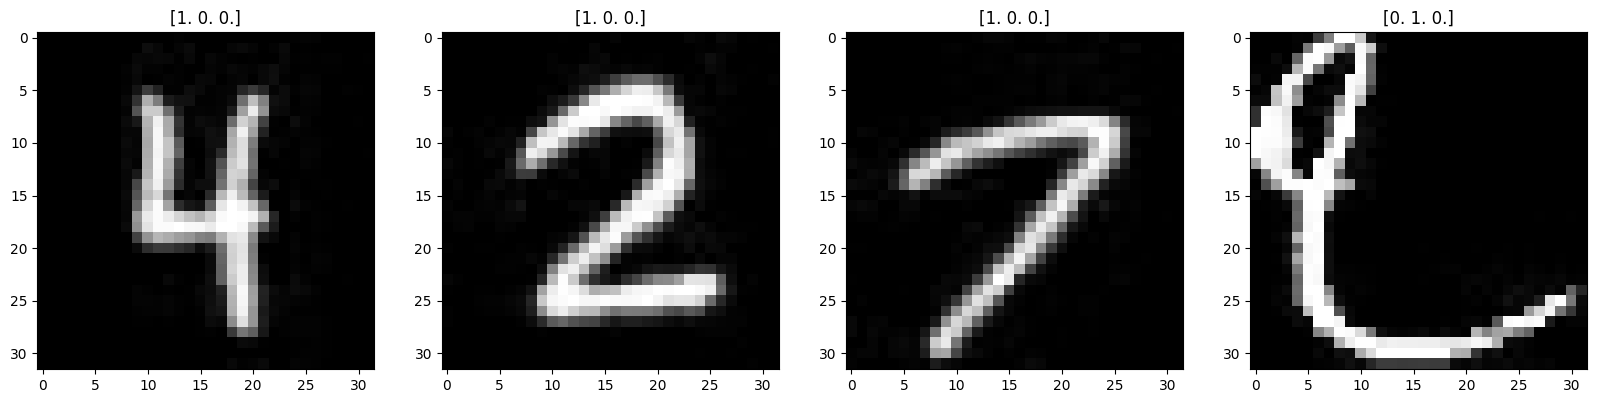

In [4]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
data = data.map(lambda x,y: (x/255, y))
batch = data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
y_true = []


for X, y in train.as_numpy_iterator():
  y= tf.argmax(y,axis=1)
  y_true.append(y)
y_true = tf.concat(y_true, axis=0).numpy()

In [7]:
y_true = tf.concat(y_true, axis=0).numpy()

In [10]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_true),y=y_true)

In [11]:
class_weights

array([0.61817358, 1.44591085, 1.44775248])

In [16]:

class_weights = dict(enumerate(class_weights))

In [12]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,Input,AveragePooling2D,BatchNormalization,Activation
from keras.callbacks import ReduceLROnPlateau
from keras import Sequential
from keras import initializers

In [7]:
input1 = Input(shape=(32, 32, 3))

In [13]:

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5),input_shape=(32, 32, 3),kernel_initializer=initializers.GlorotNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5),kernel_initializer=initializers.GlorotNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120, kernel_size=(5,5),kernel_initializer=initializers.GlorotNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(84))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [14]:
model.summary()
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3,
                                verbose=1, 
                                factor=0.5,
                                min_lr=0.00001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 6)        24        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 16)       6

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train, epochs=5, validation_data=val, callbacks=[reduceLROnPlateau],class_weight=class_weights)


Epoch 1/5
1705/1705 [==============================] - 244s 140ms/step - loss: 0.2220 - accuracy: 0.9565 - val_loss: 0.0991 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 2/5
1705/1705 [==============================] - 83s 48ms/step - loss: 0.0993 - accuracy: 0.9799 - val_loss: 0.0380 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 3/5
1705/1705 [==============================] - 83s 48ms/step - loss: 0.0635 - accuracy: 0.9863 - val_loss: 0.0529 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 4/5
1705/1705 [==============================] - 184s 108ms/step - loss: 0.0538 - accuracy: 0.9878 - val_loss: 0.0309 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/5
1705/1705 [==============================] - 93s 55ms/step - loss: 0.0420 - accuracy: 0.9896 - val_loss: 0.0254 - val_accuracy: 0.9908 - lr: 0.0010


In [19]:
# training, testing
# zeros -> 0.5378 , 0.5382
# random_normal -> 0.9857 , 0.9881
# ones -> 0.9842 , 0.9864
# GlorotNormal ( used in Resnet) -> 0.9906 , 0.9851

y_pred=model.predict(test)

243/243 [==============================] - 50s 82ms/step


In [20]:
y_true = []
y=[]

for X, y in test.as_numpy_iterator():
  y= tf.argmax(y,axis=1)
  y_true.append(y)
y_true = tf.concat(y_true, axis=0).numpy()


In [26]:
y_true=list(y_true)
y_true

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,


In [25]:
Y=[]
for i in y_pred:
    Y.append(np.argmax(i))
Y

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

#print("Accuracy : ", accuracy_score(y_true, y_pred))

confusionMatrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
disp.plot()
plt.show()
print(confusionMatrix)
print(classification_report(y_true, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [21]:

model.save('Language_Lenet_Model.h5')